In [106]:
import pandas as pd
import numpy as np
import sys
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('..')
from functions.select_cols_functions import *


In [107]:
source_file = 'feature_engineering'

In [108]:
df = pd.read_csv(f'../../data/{source_file}.csv')

In [109]:
df = adjust_categoric_values(df)

In [110]:
print(df.columns)

Index(['Type', 'Name', 'Age', 'Breed1', 'Breed2', 'Gender', 'Color1', 'Color2',
       'Color3', 'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed',
       'Sterilized', 'Health', 'Quantity', 'Fee', 'State', 'RescuerID',
       'VideoAmt', 'Description', 'PetID', 'PhotoAmt', 'AdoptionSpeed',
       'isNamed'],
      dtype='object')


In [111]:
X = df.drop(columns=['AdoptionSpeed'])
y = df['AdoptionSpeed']

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
rf = RandomForestClassifier(n_estimators=700, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=700, random_state=42)

In [114]:
y_pred = rf.predict(X_test)

In [115]:
conf_matrix = confusion_matrix(y_test, y_pred)

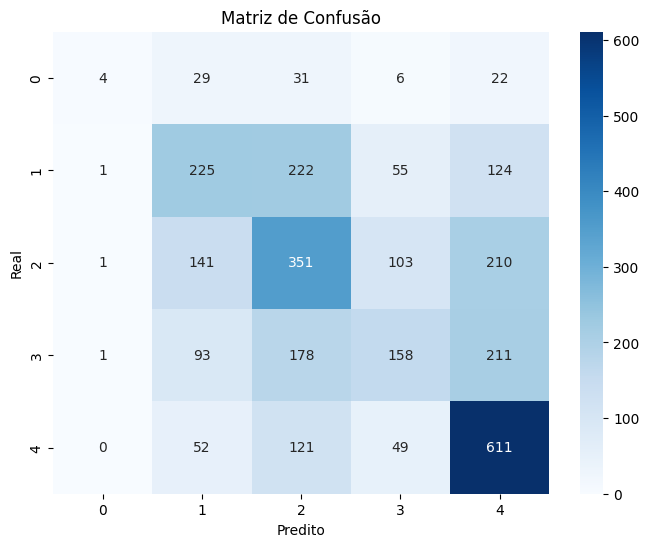

In [116]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

In [117]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.04      0.08        92
           1       0.42      0.36      0.39       627
           2       0.39      0.44      0.41       806
           3       0.43      0.25      0.31       641
           4       0.52      0.73      0.61       833

    accuracy                           0.45      2999
   macro avg       0.46      0.36      0.36      2999
weighted avg       0.44      0.45      0.43      2999



In [118]:
from sklearn.metrics import mean_absolute_error

# Calcular o MAE
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 0.8646215405135045


In [119]:
from sklearn.metrics import cohen_kappa_score

# Calculando o Quadratic Weighted Kappa
qwk = cohen_kappa_score(y_test, y_pred, weights='quadratic')
print(f'Quadratic Weighted Kappa: {qwk}')

Quadratic Weighted Kappa: 0.4110806314440083


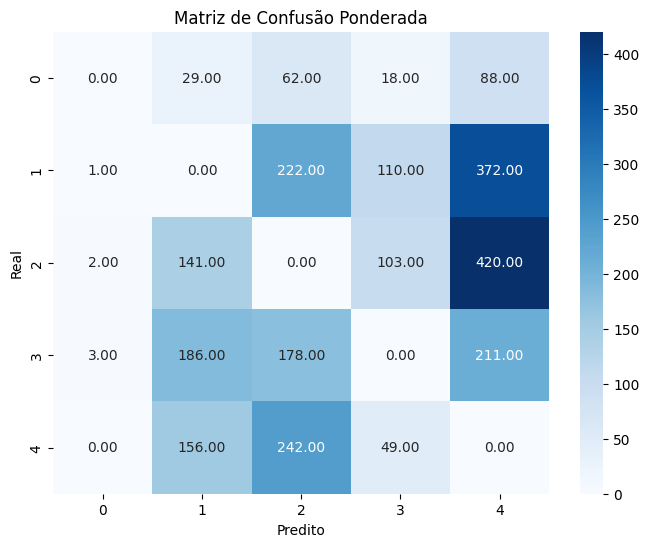

In [120]:
import numpy as np
import seaborn as sns

# Calculando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Criando uma matriz de pesos baseada na distância das classes
num_classes = len(rf.classes_)
weights = np.abs(np.arange(num_classes) - np.arange(num_classes)[:, None])

# Matriz de confusão ponderada
weighted_conf_matrix = conf_matrix * weights

# Exibindo a matriz de confusão ponderada
plt.figure(figsize=(8, 6))
sns.heatmap(weighted_conf_matrix, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão Ponderada')
plt.show()